# Geographic visualizations

## Content
1. Import data and libraries
2. Data wrangling
3. Data cleaning
4. Plot a choropleth maps
5. answers to business questions (continued)
6. Export data

## 1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import seaborn as sns
import folium
import json

In [2]:
# Turn project folder path into a string
path = r'C:\Users\Lara\Career Foundry Projects\Wake County Housing Market 2023'

# Import csv data file using os library
df_res = pd.read_csv (os.path.join(path, 'Data','Prepared Data', 'res_prop_exploratory_analysis.csv'), index_col = False)

In [3]:
# Import GeoJSON file for zip codes in Wake county
zip_geo = r'C:\Users\Lara\Career Foundry Projects\Wake County Housing Market 2023\Data\Original Data\Zip_Codes.geojson'

In [4]:
# Show GeoJSON file
f = open(r'C:\Users\Lara\Career Foundry Projects\Wake County Housing Market 2023\Data\Original Data\Zip_Codes.geojson',)
  
# Returns GeoJSON object as a dictionary
data = json.load(f)
  
# Iterating through the GeoJSON list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'OBJECTID': 17075, 'ZIPNAME': 'RALEIGH', 'ZIPNUM': 27601, 'ZIPCODE': 'RALEIGH 27601', 'NAME': 'RALEIGH', 'LAST_EDITED_DATE': None, 'SHAPEAREA': 50834991.040254, 'SHAPELEN': 43526.8278279962}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-78.63743550901678, 35.785969693401334], [-78.63771786027648, 35.78597723026695], [-78.63782013603314, 35.78606475352271], [-78.63879173563323, 35.78611427742503], [-78.63935960521312, 35.78614336286352], [-78.63941340324425, 35.78456412985539], [-78.63944210639873, 35.78398710733335], [-78.63979694172805, 35.78399416676507], [-78.63991246956257, 35.78390747332333], [-78.63980024058769, 35.78382109405265], [-78.63984389271728, 35.78272573372576], [-78.63996105078233, 35.78259077453948], [-78.63986008207529, 35.782497066979914], [-78.63986746948962, 35.78235285476656], [-78.63949664898712, 35.78234025322829], [-78.63951355720367, 35.781950871703245], [-78.63917390188934, 35.78194402728097], [-78.63920789777896, 35.

In [5]:
# Set new limits for displaying rows
pd.set_option('display.max_rows', 1000)

In [6]:
# Display the charts you created without the need to "call" them specifically.
%matplotlib inline

In [7]:
df_res.head(10)

real_estate_id  land_sale_price land_sale_date  deeded_acreage  \
0              19                0     00.00.0000            0.21   
1              20                0     00.00.0000            0.46   
2              21            28000     26.03.1999            0.43   
3              22                0     00.00.0000            0.46   
4              23                0     00.00.0000            0.79   
5              25                0     00.00.0000            0.96   
6              26                0     00.00.0000            0.51   
7              30                0     00.00.0000            0.47   
8              31                0     00.00.0000            0.39   
9              33                0     00.00.0000            0.50   

   total_sale_price total_sale_date  assessed_building_value  \
0             34500      01.01.1974                   134321   
1             35500      18.05.1983                   114933   
2                 0      00.00.0000                   132624   
3             37500      16.09.2004                   118723   
4            210000      27.06.2018                   105618   
5             70000      01.01.1971                   358290   
6                 0      00.00.0000                    85801   
7            380000      12.08.2015                   161077   
8            337500      17.07.2002                   273621   
9             32500      06.02.1979                   185581   

   assessed_land_value  year_built  units  ...  type_and_use     city  \
0               115000        1964      1  ...      1 family  RALEIGH   
1                45000        1970      1  ...      1 family  RALEIGH   
2                90000        1999      1  ...      1 family  RALEIGH   
3                32000        1900      1  ...      1 family  WENDELL   
4               112500        1916      2  ...      2 family  RALEIGH   
5               140000        1971      1  ...      1 family  RALEIGH   
6                55000        1956      1  ...      1 family  RALEIGH   
7               303875        1946      1  ...      1 family  RALEIGH   
8               200000        1970      1  ...      1 family  RALEIGH   
9               138000        1969      1  ...      1 family  RALEIGH   

   zip_code  house_age  effective_age   price_group   value_group  \
0     27610         59             43     Low price     Low value   
1     27610         53             38     Low price     Low value   
2     27606         24             24     Low price     Low value   
3     27591        123             63     Low price     Low value   
4     27606        107             63  Middle price     Low value   
5     27613         52             52     Low price  Middle value   
6     27603         67             53     Low price     Low value   
7     27607         77             43  Middle price     Low value   
8     27615         53             18  Middle price  Middle value   
9     27607         54             43     Low price     Low value   

     house_size house_age_group      effective_age_group  
0  Medium house       Old house  Effective mid-age house  
1   Small house       Old house  Effective mid-age house  
2   Small house   Mid-age house  Effective mid-age house  
3  Medium house  Very old house      Effective old house  
4  Medium house  Very old house      Effective old house  
5     Big house       Old house      Effective old house  
6   Small house       Old house      Effective old house  
7  Medium house       Old house  Effective mid-age house  
8  Medium house       Old house  Effective mid-age house  
9  Medium house       Old house  Effective mid-age house  

[10 rows x 28 columns]

In [8]:
df_res.shape

(344567, 28)

In [9]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344567 entries, 0 to 344566
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   real_estate_id           344567 non-null  int64  
 1   land_sale_price          344567 non-null  int64  
 2   land_sale_date           344567 non-null  object 
 3   deeded_acreage           344567 non-null  float64
 4   total_sale_price         344567 non-null  int64  
 5   total_sale_date          344567 non-null  object 
 6   assessed_building_value  344567 non-null  int64  
 7   assessed_land_value      344567 non-null  int64  
 8   year_built               344567 non-null  int64  
 9   units                    344567 non-null  int64  
 10  heated_area              344567 non-null  int64  
 11  utilities                344567 non-null  object 
 12  addition_year            344567 non-null  int64  
 13  effective_year           344567 non-null  int64  
 14  remo

## 2. Data wrangling

In [10]:
# Rename column 'zip_code' to 'ZIPNUM' to match GeoJSON file
df_res.rename(columns = {'zip_code' : 'ZIPNUM'}, inplace = True)

In [11]:
df_res.columns

Index(['real_estate_id', 'land_sale_price', 'land_sale_date', 'deeded_acreage',
       'total_sale_price', 'total_sale_date', 'assessed_building_value',
       'assessed_land_value', 'year_built', 'units', 'heated_area',
       'utilities', 'addition_year', 'effective_year', 'remodeled_year',
       'story_height', 'design_style', 'bath', 'type_and_use', 'city',
       'ZIPNUM', 'house_age', 'effective_age', 'price_group', 'value_group',
       'house_size', 'house_age_group', 'effective_age_group'],
      dtype='object')

## 3. Data cleaning

#### Previous analysis discovered a lot of inconsistencies and extreme values in residential properties that are not single family, so I'll remove all but single family. After that I will drop this column as it will become obsolete.

In [12]:
df_res['type_and_use'].value_counts(dropna = False)

type_and_use
1 family           341171
2 family             2221
4 family              528
3 family              388
Res. w/busi use       224
Multi family           35
Name: count, dtype: int64

In [13]:
# Create subset
df = df_res.loc[df_res['type_and_use'] == '1 family']

In [14]:
df.shape

(341171, 28)

In [15]:
df['type_and_use'].value_counts()

type_and_use
1 family    341171
Name: count, dtype: int64

In [16]:
# Drop column
df = df.drop (columns = ['type_and_use'])

In [17]:
df.shape

(341171, 27)

### Remove extreme values

In [18]:
df['total_sale_price'].value_counts().sort_index()

total_sale_price
0          19610
5              1
250            4
313           16
315            1
           ...  
6150000        1
6260000        1
6498000        1
6616500        1
7940000        1
Name: count, Length: 4192, dtype: int64

In [19]:
df['assessed_building_value'].value_counts().sort_index()

assessed_building_value
236         1
271         1
314         1
321         1
354         1
           ..
30909138    1
34876630    1
39835729    1
45692577    1
95662472    1
Name: count, Length: 215760, dtype: int64

#### Comment 
When looking at data in Excel I noticed that there are Houses with extremly high total sale price compared to sum of assessed building and land values. I will remove such extremes defined as total sale price being more than 3 times bigger than sum of both assessed values.

Also, I will remove all houses that have total sale price less than 5000, as this was approximatelly average sale price of the house in North Carolina in 1950-s and the oldest sale date is from 1958. this will also remove all houses that were never re-sold which is fine. I want to procide with analysis of houses which were sold at least once.

Column 'land_sale_price' has a lot of 0 values, because house is most of the times sold as a "package" with land and there is only data about total sale price. I will drop this column.

In [20]:
# Check values in column 'land_sale_price'
df['land_sale_price'].value_counts(dropna = False).sort_index()

land_sale_price
0          204384
190             1
500            16
800             1
1000           14
            ...  
6500000         1
7341600         1
7707000         1
8964800         1
9401000         1
Name: count, Length: 4093, dtype: int64

In [21]:
# Drop columns
df = df.drop(columns = ['land_sale_price', 'land_sale_date'])

In [22]:
df.shape

(341171, 25)

In [23]:
# Remove values < 5000 from column 'total_sale_price'
df = df.drop(df[df['total_sale_price'] < 5000].index)

In [24]:
df['total_sale_price'].value_counts().sort_index()

total_sale_price
5000       223
5500        38
5800         1
6000       101
6500        42
          ... 
6150000      1
6260000      1
6498000      1
6616500      1
7940000      1
Name: count, Length: 4159, dtype: int64

In [25]:
df.shape

(320488, 25)

In [26]:
# Create new column 'extreme_total_sale_flag'
def f(row):
    if row['total_sale_price'] > (3 * (row['assessed_land_value'] + row['assessed_building_value'])) : return 1
    else : return 0

In [27]:
df['extreme_total_sale_flag'] = df.apply(f, axis = 1)

In [28]:
df['extreme_total_sale_flag'].value_counts()

extreme_total_sale_flag
0    320350
1       138
Name: count, dtype: int64

In [29]:
# Remove 138 extreme values
df = df.drop(df[df['extreme_total_sale_flag'] == 1].index)

In [30]:
# Drop flag column
df = df.drop(columns = ['extreme_total_sale_flag'])

In [31]:
df.shape

(320350, 25)

### Checking for extremes in other columns

array([[<Axes: title={'center': 'real_estate_id'}>,
        <Axes: title={'center': 'deeded_acreage'}>,
        <Axes: title={'center': 'total_sale_price'}>,
        <Axes: title={'center': 'assessed_building_value'}>],
       [<Axes: title={'center': 'assessed_land_value'}>,
        <Axes: title={'center': 'year_built'}>,
        <Axes: title={'center': 'units'}>,
        <Axes: title={'center': 'heated_area'}>],
       [<Axes: title={'center': 'addition_year'}>,
        <Axes: title={'center': 'effective_year'}>,
        <Axes: title={'center': 'remodeled_year'}>,
        <Axes: title={'center': 'ZIPNUM'}>],
       [<Axes: title={'center': 'house_age'}>,
        <Axes: title={'center': 'effective_age'}>, <Axes: >, <Axes: >]],
      dtype=object)

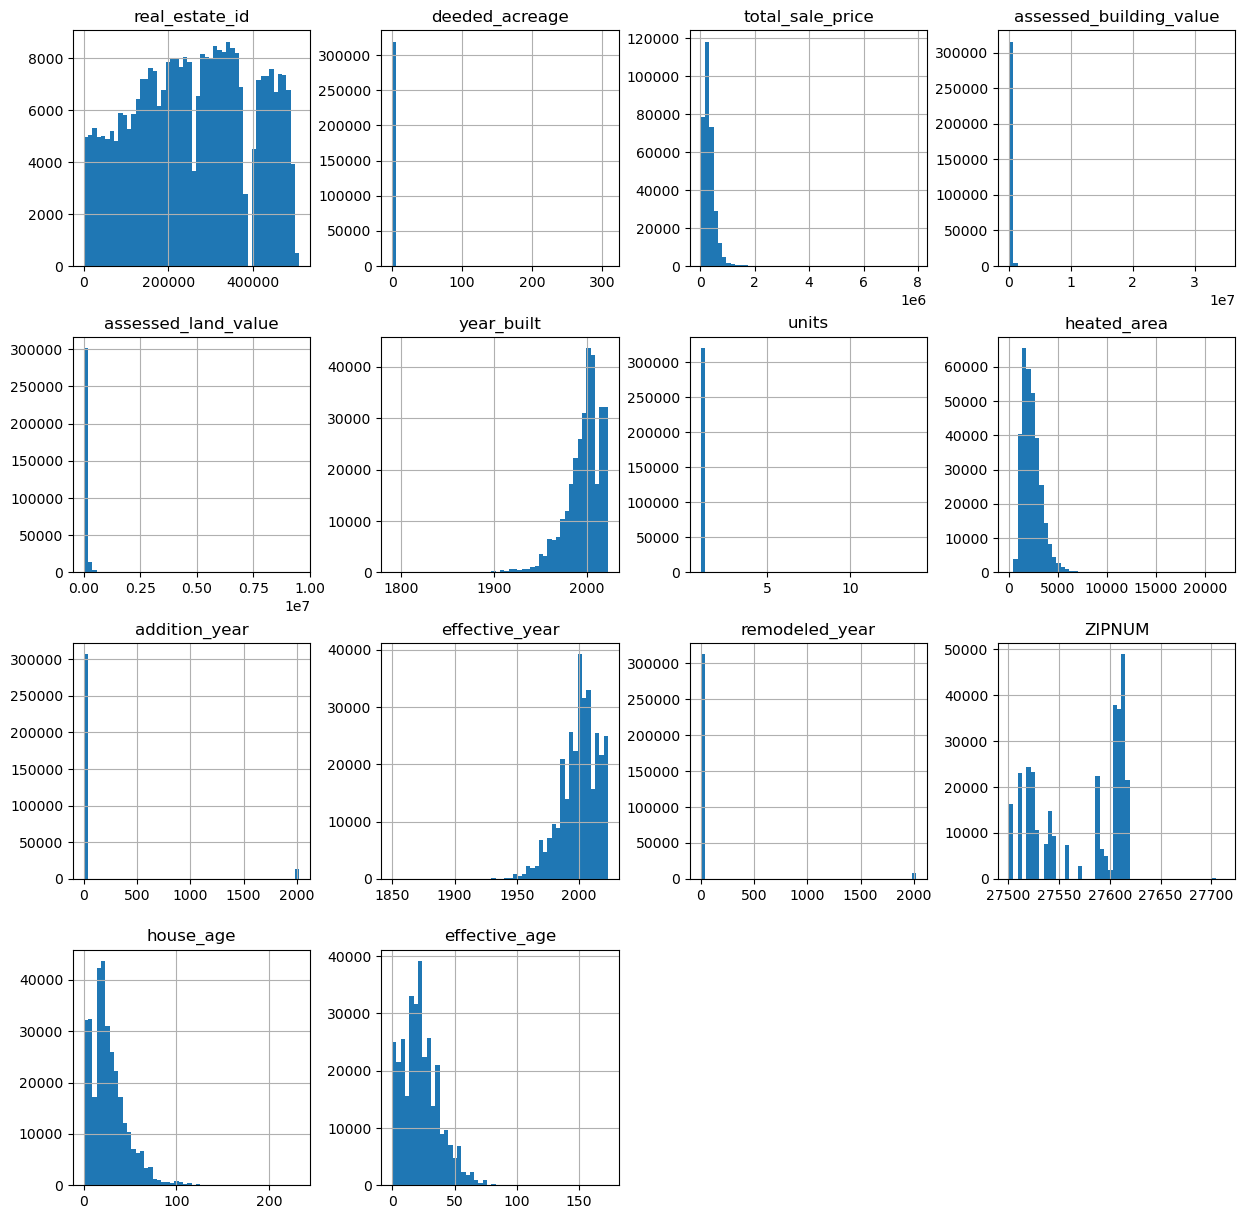

In [32]:
df.hist(bins = 50, figsize = (15, 15))

In [33]:
# Check values in column 'deeded_acreage'
df['deeded_acreage'].value_counts().sort_index()

deeded_acreage
0.00      12072
0.01        218
0.02       2686
0.03      10936
0.04      10924
          ...  
95.96         1
110.92        1
128.33        1
190.21        1
307.91        1
Name: count, Length: 1205, dtype: int64

In [34]:
# Check values in column 'assessed_land_value'
df['assessed_land_value'].value_counts().sort_index()

assessed_land_value
0          12152
871            1
1140           1
4000           1
4500           2
           ...  
3941191        1
4080735        1
4480450        1
5525829        1
9530471        1
Name: count, Length: 5709, dtype: int64

There are many lots of land with very little acreage that are suspicios. Upon investigating data in Excel I noticed that a lot of them have assessed land value 0. It turns out almost all of them also have deeded acreage 0. Which indicates that this are apartments in some building. Similar is true for the majority of land that are very very small in size (0.01 , 0.02...).
First I'll drop all assessed_land_values = 0 and check if there are any deeded_acreage values = 0 left and if yes, drop them too.

In [35]:
# Drop rows with values 0
df = df.drop(df[df['assessed_land_value'] == 0].index)

In [36]:
# Check values in column 'deeded_acreage' again
df['deeded_acreage'].value_counts().sort_index()

deeded_acreage
0.01        139
0.02       2686
0.03      10936
0.04      10924
0.05       8460
          ...  
95.96         1
110.92        1
128.33        1
190.21        1
307.91        1
Name: count, Length: 1204, dtype: int64

In [37]:
df.shape

(308198, 25)

There are also some very high acreage values that will skew average values.

In [38]:
# Create subset of all land with acreage >10
sub_over10 = df[df['deeded_acreage'] > 10]

In [39]:
sub_over10['deeded_acreage'].value_counts().sort_index()

deeded_acreage
10.01     15
10.02      2
10.03      2
10.04      3
10.05      1
10.06      2
10.07      2
10.08      4
10.09      2
10.10      4
10.11      3
10.12      3
10.13      1
10.14      2
10.16      2
10.17      1
10.20      2
10.23      1
10.25      1
10.26      2
10.30      1
10.31      1
10.33      2
10.34      1
10.35      4
10.36      1
10.37      1
10.40      2
10.42      2
10.45      2
10.46      1
10.49      1
10.50      2
10.51      2
10.53      1
10.54      1
10.55      1
10.56      1
10.58      2
10.59      2
10.61      2
10.62      1
10.63      1
10.64      1
10.66      1
10.68      2
10.69      1
10.72      1
10.73      1
10.74      1
10.75      1
10.76      1
10.77      2
10.78      1
10.84      1
10.86      1
10.87      1
10.89      1
10.91      1
10.93      1
10.94      1
10.97      1
10.98      1
11.00      2
11.01      1
11.03      2
11.04      2
11.09      2
11.11      2
11.12      1
11.14      2
11.16      1
11.17      2
11.21      1
11.22      1
11.23     

In [40]:
sub_over10.shape

(453, 25)

In [41]:
df.shape

(308198, 25)

There are only 453 properties with acreage so big, so I'll remove them all.

In [42]:
# Drop rows with values >10
df = df.drop(df[df['deeded_acreage'] > 10].index)

In [43]:
df.shape

(307745, 25)

### Cleaning column 'total_sale_date'

In [44]:
# Check sale dates
# Note: all dates are shown here in European format
df['total_sale_date'].value_counts().sort_index()

total_sale_date
00.00.0000     10
01.01.1961      1
01.01.1962      1
01.01.1963      1
01.01.1964      1
             ... 
31.12.2014     57
31.12.2015     76
31.12.2018     90
31.12.2019    109
31.12.2020     92
Name: count, Length: 10429, dtype: int64

After all this cleaning and removing rows, there are only 10 houses left that were never re-sold (they have first, original owner). Since I want to analyze sale prices and compare them to assessed values, I'll remove them all.

In [45]:
# Drop dates set up with all 0
df = df.drop(df[df['total_sale_date'] == '00.00.0000'].index)

In [46]:
df.shape

(307735, 25)

In [47]:
# Create 3 new columns and separate dates into days, months and years.
# New columns will be 'sale_month_year', 'sale_month', 'sale_year'

In [48]:
df[['sale_day', 'sale_month', 'sale_year']] = df['total_sale_date'].str.split('.', expand = True)

In [49]:
df[['total_sale_date', 'sale_day', 'sale_month', 'sale_year']]

total_sale_date sale_day sale_month sale_year
0           01.01.1974       01         01      1974
1           18.05.1983       18         05      1983
3           16.09.2004       16         09      2004
5           01.01.1971       01         01      1971
7           12.08.2015       12         08      2015
...                ...      ...        ...       ...
344520      21.09.2023       21         09      2023
344521      28.09.2023       28         09      2023
344537      16.08.2023       16         08      2023
344539      01.08.2023       01         08      2023
344561      03.10.2023       03         10      2023

[307735 rows x 4 columns]

In [50]:
# Create new column 'sale_month_year'
df['sale_month_year'] = df['sale_month'] + '/' + df['sale_year']

In [51]:
df[['sale_month_year', 'sale_month', 'sale_year']]

sale_month_year sale_month sale_year
0              01/1974         01      1974
1              05/1983         05      1983
3              09/2004         09      2004
5              01/1971         01      1971
7              08/2015         08      2015
...                ...        ...       ...
344520         09/2023         09      2023
344521         09/2023         09      2023
344537         08/2023         08      2023
344539         08/2023         08      2023
344561         10/2023         10      2023

[307735 rows x 3 columns]

In [52]:
# Drop columns 'total_sale_date' and 'sale_day'
df = df.drop (columns = ['total_sale_date', 'sale_day'])

In [53]:
df.shape

(307735, 27)

In [54]:
# Change data types for columns 'sale_month' and 'sale_year'
df['sale_month'] = df['sale_month'].astype(int)
df['sale_year'] = df['sale_year'].astype(int)

#### Check if there are any rows with sale_year smaller than built_year and if yes, remove them.

In [55]:
# Create new column 'sale_year_flag'
def f(row):
    if row['sale_year'] < row['year_built'] : return 1
    else : return 0

In [56]:
df['sale_year_flag'] = df.apply(f, axis = 1)

In [57]:
df['sale_year_flag'].value_counts()

sale_year_flag
0    305387
1      2348
Name: count, dtype: int64

It is possible house to be sold earlier that it was built when people bouht new construction up front. But it is highly unlikely that people will buy such houses more than 2 years upfront. This will be condition to filter out unusual pairs. I will create new flag column for pairs that are good with name 'upfront_sale_flag'

In [58]:
# create new flag column 'upfront_sale_flag'
def f(row):
    if row['sale_year'] < row['year_built'] -2 : return 1
    else : return 0

In [59]:
df['upfront_sale_flag'] = df.apply(f, axis = 1)

In [60]:
df['upfront_sale_flag'].value_counts()

upfront_sale_flag
0    306560
1      1175
Name: count, dtype: int64

In [61]:
# Drop all rows that have value 1 in flag column 'upfront_sale_flag'
df = df.drop(df[df['upfront_sale_flag'] == 1].index)

In [62]:
df['upfront_sale_flag'].value_counts()

upfront_sale_flag
0    306560
Name: count, dtype: int64

In [63]:
# Drop both flag columns
df = df.drop (columns = ['sale_year_flag', 'upfront_sale_flag'])

In [64]:
df.shape

(306560, 27)

# 4. Plot a choropleth maps

I plotted 4 choromaps using data_to_plot with 2 columns (one is ZIPNUM and other something else) as they are in dataframe. When plotting map for house_age it looked like all but 2 zip codes have houses old less then 16 years, then I plotted with average age per each zip code and map looked way better (it is plotted below). Ia m using same approach to all 4 maps here.

In [65]:
# Create a dataframe with average assessed_building_value by zip codes
data_to_plot_mean_value = df.groupby('ZIPNUM')['assessed_building_value'].aggregate(np.mean)

In [66]:
# Setup a folium map at a high-level zoom
# Longitude and latitude of Raleigh in Wake county, NC is used as starting point
map_mean_value = folium.Map(location = [35.78, -78.64], zoom_start = 10, min_zoom = 9, max_zoom = 15,
                 tiles="cartodb positron")

# Choropleth maps bind Pandas Data Frames and JSON geometries. This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = zip_geo, 
    data = data_to_plot_mean_value,
    columns = ['ZIPNUM','assessed_building_value'],
    key_on = 'feature.properties.ZIPNUM',
    fill_color = 'Blues', fill_opacity = 0.7, line_opacity = 1,
    legend_name = "assessed house value").add_to(map_mean_value)
folium.LayerControl().add_to(map_mean_value)

map_mean_value

In [67]:
map_mean_value.save('ch_map_mean_value.html')

In [68]:
# Check what is current dirertory where map was saved
cwd = os.getcwd()
cwd

'C:\\Users\\Lara\\Career Foundry Projects\\Wake County Housing Market 2023\\Scripts'

In [69]:
# Create a dataframe with average total_sale_price by zip codes
data_to_plot_mean_price = df.groupby('ZIPNUM')['total_sale_price'].aggregate(np.mean)

In [70]:
# Setup a folium map at a high-level zoom
# Longitude and latitude of Raleigh in Wake county, NC is used as starting point
map_mean_price = folium.Map(location = [35.78, -78.64], zoom_start = 10, min_zoom = 9, max_zoom = 15,
                 tiles="cartodb positron")

# Choropleth maps bind Pandas Data Frames and JSON geometries. This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = zip_geo, 
    data = data_to_plot_mean_price,
    columns = ['ZIPNUM','total_sale_price'],
    key_on = 'feature.properties.ZIPNUM',
    fill_color = 'Blues', fill_opacity = 0.7, line_opacity = 1,
    legend_name = "total sale price").add_to(map_mean_price)
folium.LayerControl().add_to(map_mean_price)

map_mean_price

In [71]:
map_mean_price.save('ch_map_mean_price.html')

In [72]:
# Create a dataframe with average heated_area by zip codes
data_to_plot_mean_size = df.groupby('ZIPNUM')['heated_area'].aggregate(np.mean)

In [73]:
# Setup a folium map at a high-level zoom
# Longitude and latitude of Raleigh in Wake county, NC is used as starting point
map_mean_size = folium.Map(location = [35.78, -78.64], zoom_start = 10, min_zoom = 9, max_zoom = 15,
                 tiles="cartodb positron")

# Choropleth maps bind Pandas Data Frames and JSON geometries. This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = zip_geo, 
    data = data_to_plot_mean_size,
    columns = ['ZIPNUM','heated_area'],
    key_on = 'feature.properties.ZIPNUM',
    fill_color = 'Greens', fill_opacity = 0.5, line_opacity = 1,
    legend_name = "heated area in square feet").add_to(map_mean_size)
folium.LayerControl().add_to(map_mean_size)

map_mean_size

In [74]:
map_mean_size.save('ch_map_mean_size.html')

In [75]:
# Create a dataframe with average house age by zip codes
data_to_plot_mean_age = df.groupby('ZIPNUM')['house_age'].aggregate(np.mean)

In [76]:
# Setup a folium map at a high-level zoom
# Longitude and latitude of Raleigh in Wake county, NC is used as starting point
map_mean_age = folium.Map(location = [35.78, -78.64], zoom_start = 10, min_zoom = 9, max_zoom = 15,
                 tiles="cartodb positron")

# Choropleth maps bind Pandas Data Frames and JSON geometries. This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = zip_geo, 
    data = data_to_plot_mean_age,
    columns = ['ZIPNUM','house_age'],
    key_on = 'feature.properties.ZIPNUM',
    fill_color = 'Reds', fill_opacity = 0.7, line_opacity = 1,
    legend_name = "house age").add_to(map_mean_age)
folium.LayerControl().add_to(map_mean_age)

map_mean_age

In [77]:
map_mean_age.save('ch_map_house_age.html')

As expected, choropleth maps for assessed value and total price are colored a bit differently, because there is a difference between these 2 values for each house. Total sale price is most of the time higher then assessed building value. But both show similar darker shades of zipcdes closer to RTP (those are the ones on far left side towards Chapell Hill and Durham) and around downtown rleigh, approximately in the middle of all zipcodes.

There is a similar pattern when I look at 3rd map with heated area (or we can say size of the house) and total sale price. It looks like similar areas are colored in darker colors, which implies that bigger houses are more expensive. This relationship was also discovered in correlation jeatmap.

Map for house age indicates that the oldest houses exist around downtown raleigh, which was expected. I dont see similar pattern in shading as for total sale price.

I would love to add some numbers and markers on these maps to be have more information in the future.

## 5. Answers to business questions (continued)

#### 1. Does age of residential property affects the price? How much?

Yes, it does. There is medium strenght correlation, and this will still be a good hypothesis to test.

#### 2. How sale price and assessed value of property changed over the years?

This will be answered later.

#### 3. Are properties more expensive in bigger cities? How about cities closer to RTP?

From choropleth maps it looks like houses are more expensive closer to RTP (most left zip codes on the map) and around downtown Raleigh in the middle, as it was expected.

#### 4. Does design style, baths, utilities or something else affects assessed value?

More baths does affect value of the house, but this is logical as in US larger houses have more baths. I won't explore utilities any more as there is a wide range of different combinations for what utilities house can have or not have. As for the design, categorical plots for both assessed building value and total sale price showed that there are certain designs that drive higher value or price such as : cape, contemporary, colonial, conventional.

#### 5. Can we forecast price or assessed value of property?

This will be answered later.

#### 6. What is the average age of property, average land deeded, average heated area, average assessed value? How does this compare in each city?

Average age of house is 27.55, average deeded acreage is 0.55, average heated area 2304.14, average assessed value 260987.04 and average total sale price 293349.82. In 4 choropleth maps above I used average values of assessed building value, total sale price, heated area and house age per each zipcode. Numerical tables are presented below at the end. It looks like zipcodes differ in average numbes of these 4 values, and all variables, except house age follow similar pattern : closer to RTP and around downtown Raleigh houses are more valuable, have bigger prices and are bigger too to some extent, because value or price is also driven by location. As expected, older houss are primarely around downtown Raleigh or other places where cities started developing decades ago.

#### 7. In what month are most houses sold? What was average price? Is this similar in each zip code?

This will be answered later.

#### 8. How does age of property compare to effective year? How does this compares to zip codes?

It was shown on correlation heatmap that there is very strong positive correlation (0.85) and scatterplot showed that there is a cut-off value for each actual age what effective age could be. Age of property (house age) was maped and discussed in previous question. Effective age was not plotted at all. 

In [78]:
# Average age of property
round(df_res['house_age'].mean(), 2)

27.55

In [79]:
# Average deeded acreage
round(df_res['deeded_acreage'].mean(), 2)

0.55

In [80]:
# Average heated area
round(df_res['heated_area'].mean(), 2)

2304.14

In [81]:
# Average assesed value
round(df_res['assessed_building_value'].mean(), 2)

260987.04

In [82]:
# Average total sale price
round(df_res['total_sale_price'].mean(), 2)

293349.82

### Numerical tables with average values for 4 variables from maps by each zip code

In [83]:
mean_value = df.groupby('ZIPNUM')['assessed_building_value'].agg(['count', 'mean'])
mean_value

count           mean
ZIPNUM                      
27501     360  212299.733333
27502   15641  289066.233361
27511    9308  210342.321874
27513   12737  277144.282955
27518    5860  363183.853754
27519   17981  358868.026639
27523    5036  366280.409651
27526   18113  243688.097278
27529   10460  188306.901625
27539    7553  312418.972726
27540   14655  303775.493620
27545    9188  194916.064976
27560    7126  274773.552905
27571    2859  276441.429871
27587   21922  297193.429340
27591    6323  190796.051558
27597    4842  189261.770756
27601    1357  197130.913780
27603   12757  217511.749001
27604   12080  170301.581291
27605     585  324584.158974
27606    7567  249840.287036
27607    4393  276960.454587
27608    3588  349720.365942
27609    8361  226163.366224
27610   19128  155089.087045
27612    9890  275957.596562
27613   12970  292791.758443
27614   10098  366061.802733
27615   13187  268448.527641
27616   16323  193822.129756
27617    4121  279747.134191
27703     189  254150.211640
27713       2   67781.000000

In [84]:
mean_price = df.groupby('ZIPNUM')['total_sale_price'].agg(['count', 'mean'])
mean_price

count           mean
ZIPNUM                      
27501     360  293506.944444
27502   15641  361027.200946
27511    9308  257444.236141
27513   12737  322992.536547
27518    5860  417573.638737
27519   17981  432011.261888
27523    5036  487880.075854
27526   18113  310702.228510
27529   10460  223314.072180
27539    7553  366609.556335
27540   14655  373596.332583
27545    9188  219641.290052
27560    7126  329340.246281
27571    2859  339797.633788
27587   21922  366240.856902
27591    6323  238439.332753
27597    4842  229797.530979
27601    1357  317738.008106
27603   12757  252527.908207
27604   12080  207211.329801
27605     585  479971.442735
27606    7567  289385.160698
27607    4393  406243.942408
27608    3588  558790.273133
27609    8361  340742.779931
27610   19128  176215.398892
27612    9890  337507.431951
27613   12970  333669.131457
27614   10098  434660.568429
27615   13187  317027.391067
27616   16323  228208.463947
27617    4121  337371.244843
27703     189  326563.492063
27713       2   10500.000000

In [85]:
mean_size = df.groupby('ZIPNUM')['heated_area'].agg(['count', 'mean'])
mean_size

count         mean
ZIPNUM                    
27501     360  2446.619444
27502   15641  2463.619398
27511    9308  2091.307263
27513   12737  2396.437073
27518    5860  3069.002389
27519   17981  2896.268561
27523    5036  2972.766084
27526   18113  2274.987688
27529   10460  1962.138719
27539    7553  2669.900437
27540   14655  2593.041897
27545    9188  1975.988681
27560    7126  2376.127421
27571    2859  2669.712487
27587   21922  2656.559757
27591    6323  1847.864938
27597    4842  1949.540066
27601    1357  1536.103906
27603   12757  2012.959944
27604   12080  1685.429305
27605     585  2472.232479
27606    7567  2193.039778
27607    4393  2435.284316
27608    3588  2678.410814
27609    8361  2261.700634
27610   19128  1664.488394
27612    9890  2413.291001
27613   12970  2532.649807
27614   10098  3127.821252
27615   13187  2438.890119
27616   16323  1951.372052
27617    4121  2391.952196
27703     189  1905.052910
27713       2  1172.000000

In [86]:
mean_age = df.groupby('ZIPNUM')['house_age'].agg(['count', 'mean'])
mean_age

count       mean
ZIPNUM                  
27501     360   7.663889
27502   15641  18.225369
27511    9308  42.169639
27513   12737  28.842742
27518    5860  26.854949
27519   17981  15.355709
27523    5036  11.315131
27526   18113  17.415558
27529   10460  31.637572
27539    7553  20.240964
27540   14655  15.427772
27545    9188  22.993579
27560    7126  16.277154
27571    2859  13.848898
27587   21922  19.202810
27591    6323  23.486162
27597    4842  24.136927
27601    1357  58.236551
27603   12757  29.968410
27604   12080  36.908030
27605     585  84.835897
27606    7567  34.209726
27607    4393  46.297291
27608    3588  59.994426
27609    8361  46.659730
27610   19128  29.489806
27612    9890  33.434985
27613   12970  29.661527
27614   10098  23.371658
27615   13187  35.056950
27616   16323  19.992648
27617    4121  20.308178
27703     189   6.804233
27713       2  86.500000

## 6. Export data

In [87]:
# Export df_res as csv file
df.to_csv(os.path.join(path, 'Data','Prepared Data', 'single_homes_cleaned.csv'), index = False)